In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

In [9]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [11]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [12]:
# We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [23]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
scores_ncv = {}
scores_cv = {}
for i in range(10, 100, 10):
    #print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    scores_ncv[i] = round(model.score(X_test, y_test) * 100, 5)
    scores_cv[i] = np.mean(cross_val_score(model, X, y, cv=5)) * 100
    
print(len(scores_ncv.values())), print(len(scores_cv.values()))

9
9


(None, None)

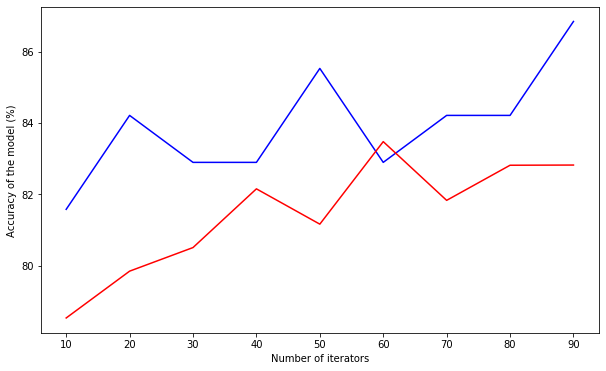

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(scores_ncv), list(scores_ncv.values()), color='blue')
ax.plot(list(scores_cv), list(scores_cv.values()), color='red')
# ax[1,0].plot()

ax.set(xlabel="Number of iterators" ,ylabel="Accuracy of the model (%)");